## Reinforcement Learning

In reinforcement learning, rather than feeding a model millions of examples, we let a model explore an environment.  

### Terminology

**Environment:** In reinforcement learning tasks we have the notion of the environment, which is what our agent will explore.  An example of an environment in the case of training an AI to play Starcraft would encompass the game state, mechanics, and rules of the game.

**Agent:** An agent is the entity that is exploring the environment.  In starcraft it would be the player

**State:** The agent will always be in a certain "state."  This would probably be the locations of the agent's units, the resources they have, maybe even camera position, etc.

**Action:** Any interaction between the agent and the environment is an "action."  Selecting a unit or pressing the "spawn overlord" key are examples of actions.

**Reward:** Every action that our agent takes will result in a reward of some magnitude (positive or negative).  A-moving a group of mutas into a psi storm would result in a large negative reward.

The most important part of reinforcement learning is determining how to reward the agent.

### Q-Learning
Essentially what Q-learning is is building a table or matrix-like data structure where each row is a state and each column is an action.
| A1 | A2 | A3 | A4 |
| -- | -- | -- | -- |
| 0  | 0  | 10 | 5  |
| 5  | 10 | 0  | 5  |
| 10 | 5  | 0  | 0  |

An agent learns by exploring the environment and observing the reward from each action in each state.  It can either randomly pick an action or use the current Q-table to find the best action.  Towards the beginning of the exploration, the agent will mostly take random actions, and as time goes on it will gradually shift towards the Q-table.  If it leans too heavily on the Q-table too quickly, it can get trapped in a local maximum.
The formula for updating the Q-table after each action is:
> $ Q[state, action] = Q[state, action] + \alpha * (reward + \gamma * max(Q[newState, :]) - Q[state, action]) $

where $\alpha$ stands for the **Learning Rate** and $\gamma$ stands for the **Discount Factor**

#### Learning Rate
The learning rate $\alpha$ is a numeric constant that defines how much change is permitted on each Q-table update.  A high learning rate means that each update will introduce a large change to the current state/action value.

#### Discount Factor $\gamma$
The discount factor is used to balance how much focus is put on the current action.  A high discount factor means that future rewards will be considered more heavily.

### Q Learning Example
Here we will use the OpenAI Gym to practice Q-learning

In [1]:
import gymnasium as gym

In [2]:
env = gym.make('FrozenLake-v1', render_mode="rgb_array")

In [3]:
print(env.observation_space.n)
print(env.action_space.n)

16
4


In [4]:
env.reset()

(0, {'prob': 1})

In [5]:
action = env.action_space.sample() # get a random action
observation, reward, terminated, truncated, info = env.step(action)
env.render()

array([[[180, 200, 230],
        [180, 200, 230],
        [180, 200, 230],
        ...,
        [180, 200, 230],
        [180, 200, 230],
        [180, 200, 230]],

       [[180, 200, 230],
        [204, 230, 255],
        [204, 230, 255],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       [[180, 200, 230],
        [235, 245, 249],
        [204, 230, 255],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       ...,

       [[180, 200, 230],
        [235, 245, 249],
        [235, 245, 249],
        ...,
        [204, 230, 255],
        [235, 245, 249],
        [180, 200, 230]],

       [[180, 200, 230],
        [235, 245, 249],
        [235, 245, 249],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       [[180, 200, 230],
        [180, 200, 230],
        [180, 200, 230],
        ...,
        [180, 200, 230],
        [180, 200, 230],
        [180, 200, 230]]

### Ok that was just playing around, now let's go for real

In [6]:
import gymnasium as gym
import numpy as np
import time

env = gym.make('FrozenLake-v1', render_mode="rgb_array")
STATES = env.observation_space.n
ACTIONS = env.action_space.n
Q = np.zeros((STATES, ACTIONS))

EPISODES = 10000
MAX_STEPS = 100

LEARNING_RATE = 0.81
GAMMA = 0.96

RENDER = False

epsilon = 0.9 # start with 90% chance to choose random action

rewards = []

for episode in range(EPISODES):
    state = env.reset()[0]
    for _ in range(MAX_STEPS):
        if RENDER:
            env.render()
            
        if np.random.uniform(0, 1) < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(Q[state, :])
            
        next_state, reward, terminated, _, _ = env.step(action)
        
        Q[state, action] = Q[state, action] + LEARNING_RATE * (reward + GAMMA * np.max(Q[next_state, :]) - Q[state, action])
        state = next_state
        if terminated:
            rewards.append(reward)
            epsilon -= 0.001
            break
print(Q)
print(f"Average reward: {sum(rewards) / len(rewards)}:")

[[1.87043313e-01 9.57265286e-03 1.02669619e-02 1.05076313e-02]
 [2.60306680e-03 3.54484027e-03 4.64713483e-03 3.15159519e-01]
 [1.76340850e-01 1.85591063e-03 2.74241495e-03 4.45985277e-03]
 [1.40172721e-03 1.93037392e-03 3.18072505e-03 4.43367340e-03]
 [3.27105459e-01 2.99683640e-03 2.65572364e-03 3.83339501e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.68884398e-03 1.98619997e-06 1.32867194e-06 4.21886220e-08]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [2.49410984e-03 3.31460055e-03 6.52447866e-03 5.07923845e-01]
 [6.97246405e-04 1.45759000e-01 1.81079665e-03 1.66612252e-03]
 [7.83196285e-01 2.49918710e-04 2.96716350e-04 1.85845680e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [2.24535531e-02 5.59701404e-02 7.72875093e-01 3.59427113e-02]
 [1.49175962e-01 9.62991968e-01 1.20025785e-01 1.07701007e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.000000

In [7]:
print(state)
print(action)

15
1


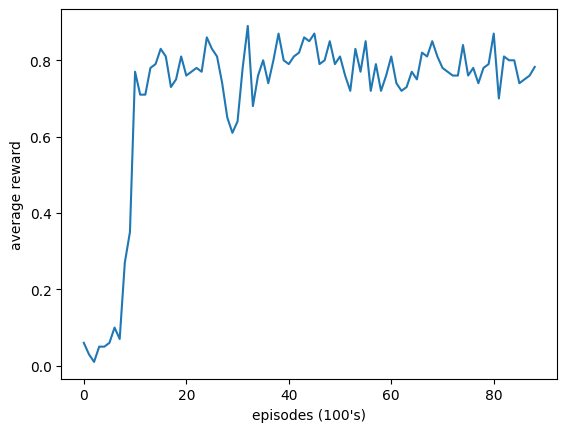

In [8]:
import matplotlib.pyplot as plt

def get_average(values):
    return sum(values)/len(values)

avg_rewards = []
for i in range(0, len(rewards), 100):
    avg_rewards.append(get_average(rewards[i:i+100]))
    
plt.plot(avg_rewards)
plt.ylabel('average reward')
plt.xlabel('episodes (100\'s)')
plt.show()